In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [15]:
def run(episodes=1000, is_training=True, render=False):
    env = gym.make('MountainCar-v0', render_mode='human' if render else None)

    pos_space = np.linspace(env.observation_space.low[0], env.observation_space.high[0], 20) # -1.2 - 0.6
    vel_space = np.linspace(env.observation_space.low[1], env.observation_space.high[1], 20) # -0.07 - 0.07

    if is_training:
        q = np.zeros((len(pos_space), len(vel_space), env.action_space.n)) # 20x20x3 array
    else:
        f = open('mountain_car.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9
    discount_factor_g = 0.9

    epsilon = 1
    epsilon_decay_rate = 2 / episodes
    rng = np.random.default_rng()

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]
        state_p = np.digitize(state[0], pos_space)
        state_v = np.digitize(state[1], vel_space)

        terminated = False
        rewards = 0

        while (not terminated and rewards > -1000):
            
            if is_training and rng.random() < epsilon:
                # 0 - left, 1 - stay, 2 - right
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state_p, state_v, :])

            new_state, reward, terminated, _, _ = env.step(action)
            new_state_p = np.digitize(state[0], pos_space)
            new_state_v = np.digitize(state[1], vel_space)

            if is_training:
                q[state_p, state_v, action] = q[state_p, state_v, action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state_p, new_state_v, :]) - q[state_p, state_v, action]
                )

            state = new_state
            state_p = new_state_p
            state_v = new_state_v
            rewards += reward

        epsilon = max(epsilon - epsilon_decay_rate, 0)
        rewards_per_episode[i] = rewards

        # if i % 10 == 0:
        print(f'Episode {i+1}/{episodes}, rewards: {rewards}')

    if is_training:
        f = open('mountain_car.pkl', 'wb')
        pickle.dump(q, f)
        f.close()

    mean_rewards = np.zeros(episodes)
    for t in range(episodes):
        mean_rewards[t] = np.mean(rewards_per_episode[max(0, t-100):t+1])
    plt.plot(mean_rewards)
    plt.savefig('mountain_car.png')

    env.close()

Episode 1/5000, rewards: -1000.0
Episode 2/5000, rewards: -1000.0
Episode 3/5000, rewards: -1000.0
Episode 4/5000, rewards: -1000.0
Episode 5/5000, rewards: -1000.0
Episode 6/5000, rewards: -1000.0
Episode 7/5000, rewards: -1000.0
Episode 8/5000, rewards: -1000.0
Episode 9/5000, rewards: -1000.0
Episode 10/5000, rewards: -1000.0
Episode 11/5000, rewards: -1000.0
Episode 12/5000, rewards: -1000.0
Episode 13/5000, rewards: -1000.0
Episode 14/5000, rewards: -1000.0
Episode 15/5000, rewards: -1000.0
Episode 16/5000, rewards: -1000.0
Episode 17/5000, rewards: -1000.0
Episode 18/5000, rewards: -1000.0
Episode 19/5000, rewards: -1000.0
Episode 20/5000, rewards: -1000.0
Episode 21/5000, rewards: -1000.0
Episode 22/5000, rewards: -1000.0
Episode 23/5000, rewards: -1000.0
Episode 24/5000, rewards: -1000.0
Episode 25/5000, rewards: -1000.0
Episode 26/5000, rewards: -1000.0
Episode 27/5000, rewards: -1000.0
Episode 28/5000, rewards: -1000.0
Episode 29/5000, rewards: -1000.0
Episode 30/5000, reward

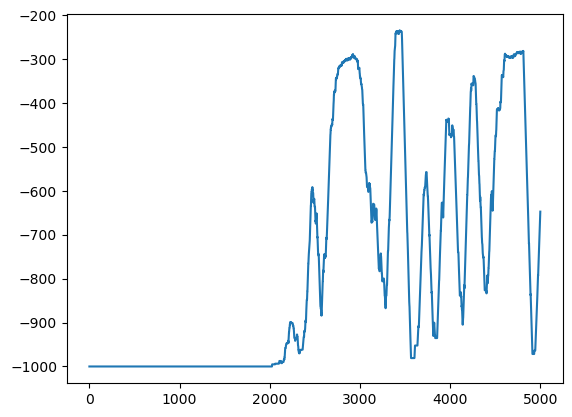

In [16]:
run(5000, True, False)

Episode 1/10, rewards: -308.0
Episode 2/10, rewards: -405.0
Episode 3/10, rewards: -286.0
Episode 4/10, rewards: -479.0
Episode 5/10, rewards: -368.0
Episode 6/10, rewards: -397.0
Episode 7/10, rewards: -305.0
Episode 8/10, rewards: -368.0
Episode 9/10, rewards: -466.0
Episode 10/10, rewards: -283.0


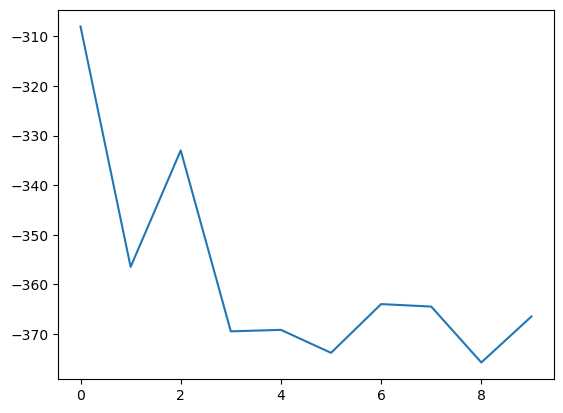

In [17]:
run(10, False, True)